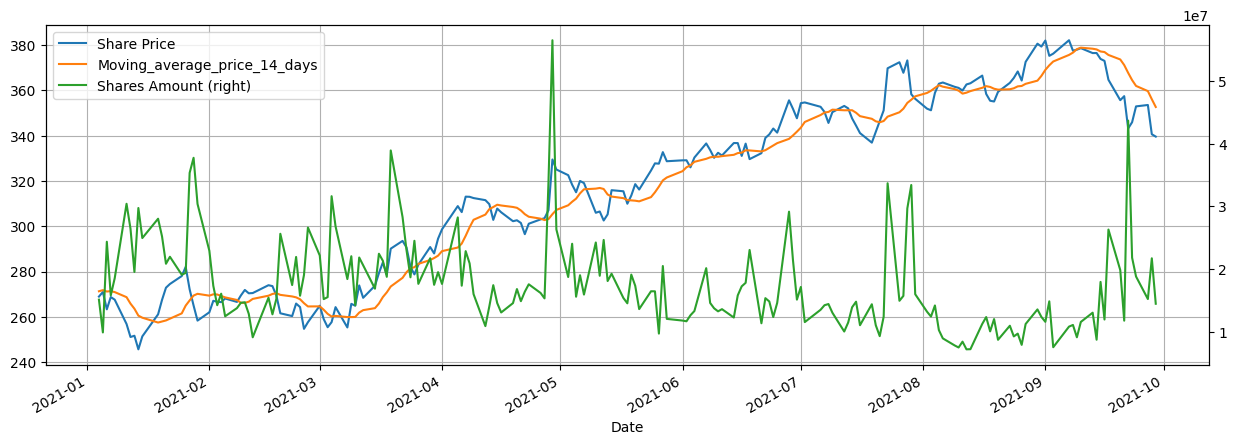

In [13]:
"""
Graphic dashboard presenting Facebook shares.
Shares price are shown alongside moving average sahre price for last 14 days, with total shares amount.
Data: https://www.nasdaq.com/market-activity/stocks/fb/historical 
"""

import pandas as pd

def del_dollar(data: str) -> float:
    if isinstance(data, str):
        return float(data.replace('$', ''))
    else:
        return data

df = pd.read_csv(
    'data/fb.csv',
    parse_dates=['Date'],
    index_col="Date",
    engine='python',
    thousands=',',
).rename(columns={
    'Close/Last': 'Share Price',
    'Volume':'Shares Amount'
}).apply(
    lambda column: column.apply(del_dollar) # apply() needs to be done for each column and then each cell
).sort_index(
    ascending=True, 
).assign(
    Moving_average_price_14_days=lambda x: x['Share Price'].rolling('14D').mean(),
)['2021':].plot(
    y=['Share Price', 'Moving_average_price_14_days', 'Shares Amount'],
    secondary_y='Shares Amount',
    figsize=(15,5),
).grid(True)